<a href="https://colab.research.google.com/github/VEDANG2108/EDA-PROJECT/blob/main/22BDS0057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align:left;">
  <b>Name:</b> VEDANG JITENDRA GARG<br>
  <b>Reg No:</b> 22BDS0057
</div>

<div style="display:flex; justify-content:center; align-items:center;">
  <h1>EXPLORATORY DATA ANALYSIS PROJECT</h1>
</div>



Dataset link: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Liver%20Data.csv

<h2><b> Load the Dataset </b></h2>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Liver%20Data.csv"

df = pd.read_csv(url)

df.head()


Age of the patient Gender of the patient  Total Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3                            14.0                             20.0   
4                            27.0                             59.0   

   Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  Result  
0             6.8           3.3                                  0.90       1  
1             7.5           3.2                                  0.74       1  
2             7.0           3.3                                  0.89       1  
3             6.8           3.4                                  1.00       1  
4             7.3           2.4                                  0.40       1

<h2><b> Dimensions </b></h2>

In [13]:
# 1. Shape of dataset
rows, cols = df.shape
print(f"Dataset Dimensions: {rows} rows × {cols} columns")

# 2. Feature type counts
print("\nFeature Types Count:")
print(df.dtypes.value_counts())

# 3. Data Types & Non-null Counts
print("\n--- Data Types & Non-null Counts ---")
print(df.info())



Dataset Dimensions: 30691 rows × 11 columns

Feature Types Count:
float64    9
object     1
int64      1
Name: count, dtype: int64

--- Data Types & Non-null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non

<h2><b> Summary Statistics </b></h2>

In [14]:
# Numerical summary statistics
print("\n--- Numerical Summary Statistics ---")
print(df.describe())

# Categorical summary statistics
print("\n--- Categorical Summary Statistics ---")
print(df.describe(include='object'))

# Value counts for categorical columns
print("\n--- Value Counts for Categorical Columns ---")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())



--- Numerical Summary Statistics ---
       Age of the patient  Total Bilirubin  Direct Bilirubin  \
count        30689.000000     30043.000000      30130.000000   
mean            44.107205         3.370319          1.528042   
std             15.981043         6.255522          2.869592   
min              4.000000         0.400000          0.100000   
25%             32.000000         0.800000          0.200000   
50%             45.000000         1.000000          0.300000   
75%             55.000000         2.700000          1.300000   
max             90.000000        75.000000         19.700000   

        Alkphos Alkaline Phosphotase   Sgpt Alamine Aminotransferase  \
count                   29895.000000                    30153.000000   
mean                      289.075364                       81.488641   
std                       238.537589                      182.158850   
min                        63.000000                       10.000000   
25%                      

<b> Data Handling </b>

In [15]:
# --- Data Handling ---
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

df.columns = (
    df.columns
    .str.strip()                                 # Remove leading/trailing spaces
    .str.replace(r'\s+', '_', regex=True)        # Replace multiple spaces with underscore
    .str.replace(r'[^\w]', '', regex=True)       # Remove special characters
)

df.columns = df.columns.str.strip()        # remove spaces at start/end
df.columns = df.columns.str.lower()        # make lowercase



--- Missing Values Count ---
Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

--- Duplicate Rows ---
11323


<h2><b> Data Cleaning </b></h2>

In [16]:
# --- Data Cleaning ---
# Example: Strip column names of spaces
df.columns = df.columns.str.strip()

# Fill missing numerical with mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill missing categorical with mode
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handling outliers using IQR method
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Verify cleaning
print("After Cleaning:")
print(df.info(), "\n")
print("Missing Values Count After Cleaning:")
print(df.isnull().sum(), "\n")
print(f"Shape After Cleaning: {df.shape}")

After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 11207 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age_of_the_patient                   11207 non-null  float64
 1   gender_of_the_patient                11207 non-null  object 
 2   total_bilirubin                      11207 non-null  float64
 3   direct_bilirubin                     11207 non-null  float64
 4   alkphos_alkaline_phosphotase         11207 non-null  float64
 5   sgpt_alamine_aminotransferase        11207 non-null  float64
 6   sgot_aspartate_aminotransferase      11207 non-null  float64
 7   total_protiens                       11207 non-null  float64
 8   alb_albumin                          11207 non-null  float64
 9   ag_ratio_albumin_and_globulin_ratio  11207 non-null  float64
 10  result                               11207 non-null  int64  
dtypes: float64(9), in

<h2><b> Univariate Analysis </b> </h2>


Value Counts for gender_of_the_patient:
 gender_of_the_patient
Male      7908
Female    3299
Name: count, dtype: int64


/tmp/ipython-input-816464839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


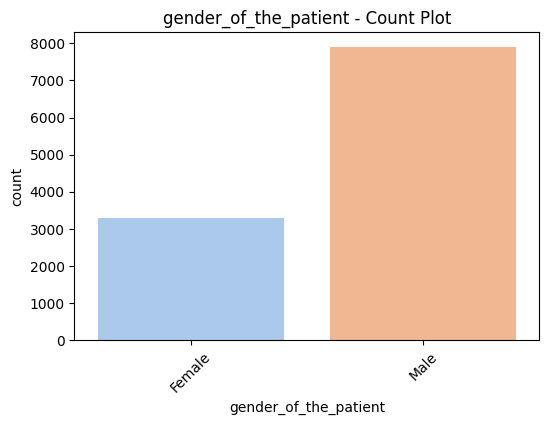


Summary Statistics for age_of_the_patient:
 count    11207.000000
mean        43.693227
std         16.376928
min          4.000000
25%         32.000000
50%         45.000000
75%         55.000000
max         89.000000
Name: age_of_the_patient, dtype: float64


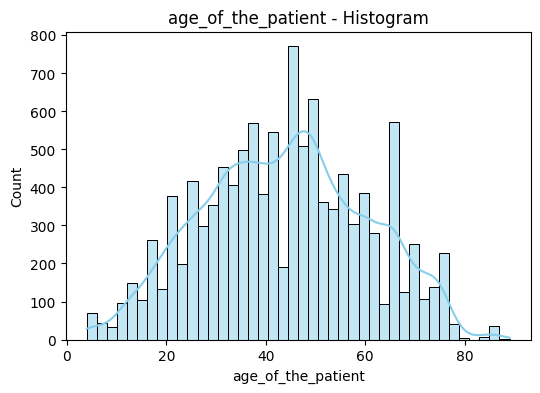

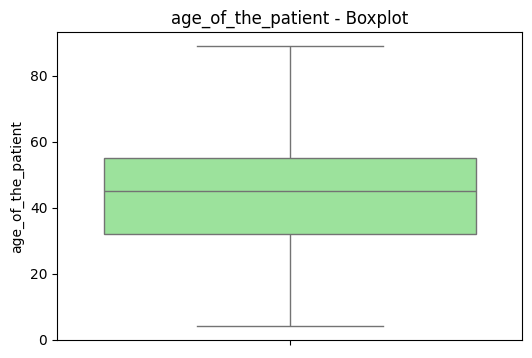


Summary Statistics for total_bilirubin:
 count    11207.000000
mean         1.153335
std          0.718653
min          0.500000
25%          0.700000
50%          0.800000
75%          1.300000
max          5.300000
Name: total_bilirubin, dtype: float64


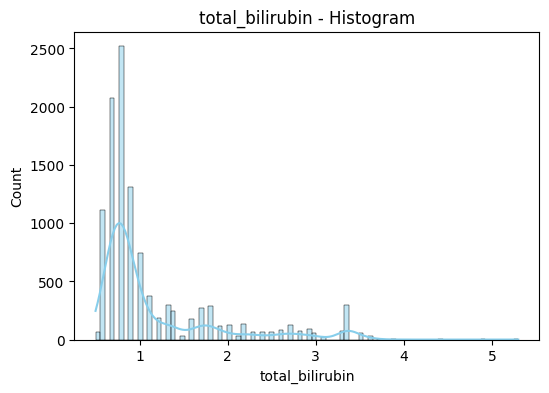

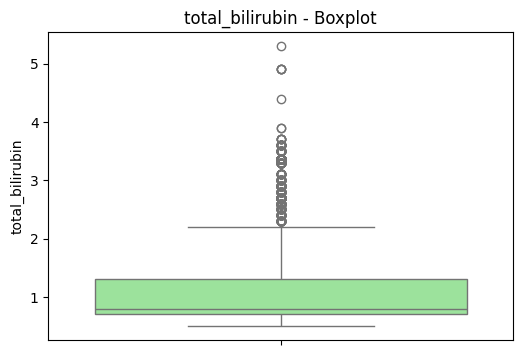


Summary Statistics for direct_bilirubin:
 count    11207.000000
mean         0.411382
std          0.397197
min          0.100000
25%          0.200000
50%          0.200000
75%          0.500000
max          1.700000
Name: direct_bilirubin, dtype: float64


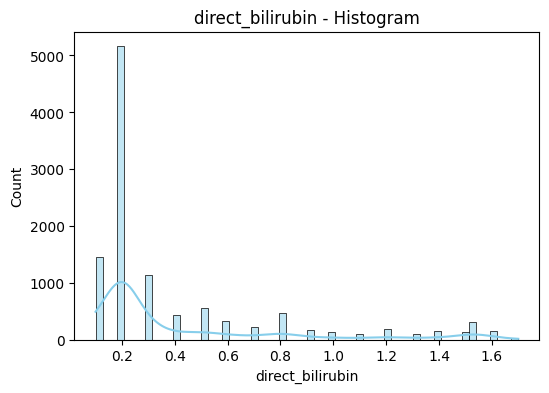

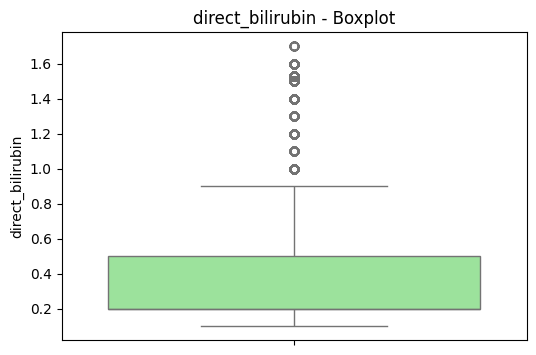


Summary Statistics for alkphos_alkaline_phosphotase:
 count    11207.000000
mean       209.386276
std         65.767538
min         63.000000
25%        166.000000
50%        194.000000
75%        237.000000
max        462.000000
Name: alkphos_alkaline_phosphotase, dtype: float64


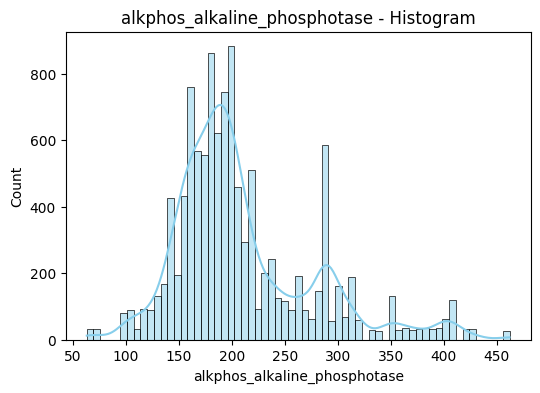

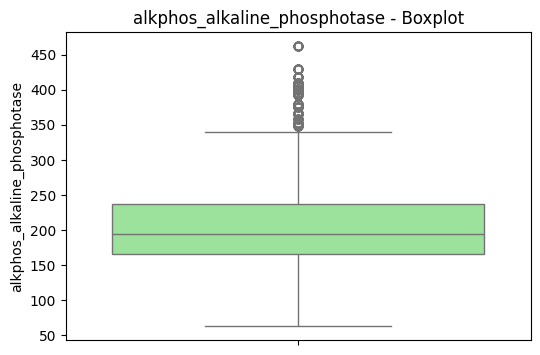


Summary Statistics for sgpt_alamine_aminotransferase:
 count    11207.000000
mean        32.285585
std         16.877042
min         10.000000
25%         21.000000
50%         28.000000
75%         40.000000
max         91.000000
Name: sgpt_alamine_aminotransferase, dtype: float64


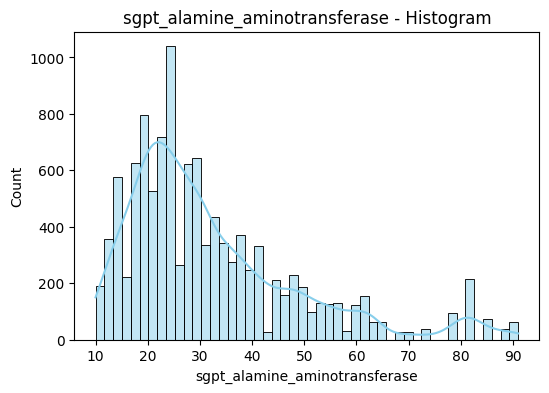

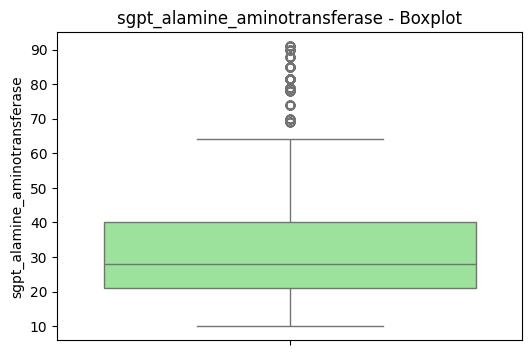


Summary Statistics for sgot_aspartate_aminotransferase:
 count    11207.000000
mean        35.450879
std         18.395478
min         10.000000
25%         22.000000
50%         30.000000
75%         45.000000
max         98.000000
Name: sgot_aspartate_aminotransferase, dtype: float64


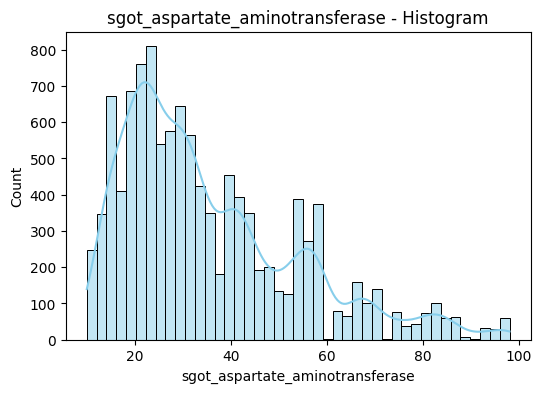

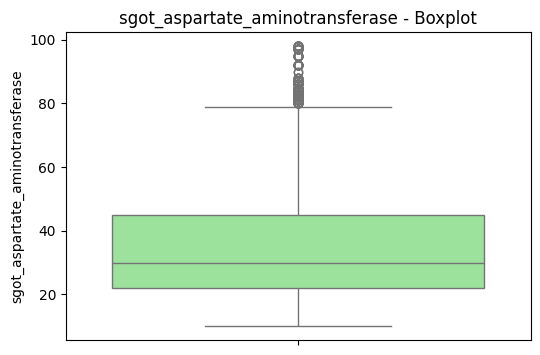


Summary Statistics for total_protiens:
 count    11207.000000
mean         6.570126
std          1.020635
min          3.900000
25%          5.900000
50%          6.600000
75%          7.300000
max          9.200000
Name: total_protiens, dtype: float64


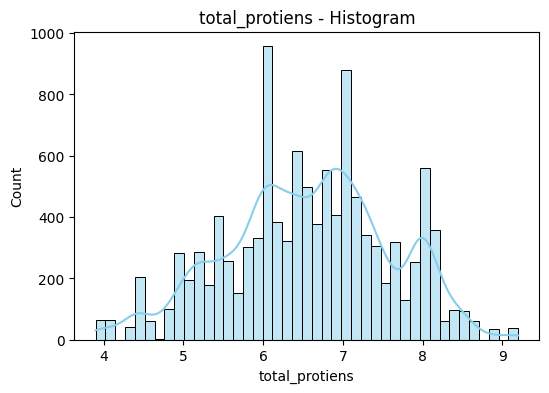

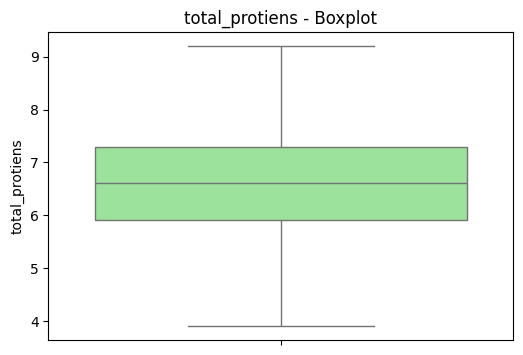


Summary Statistics for alb_albumin:
 count    11207.000000
mean         3.274952
std          0.721449
min          1.400000
25%          2.800000
50%          3.200000
75%          3.900000
max          5.000000
Name: alb_albumin, dtype: float64


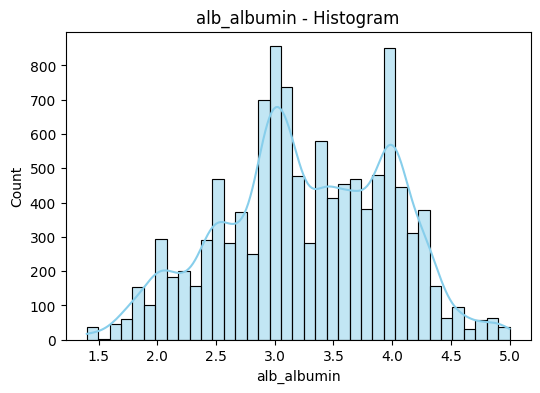

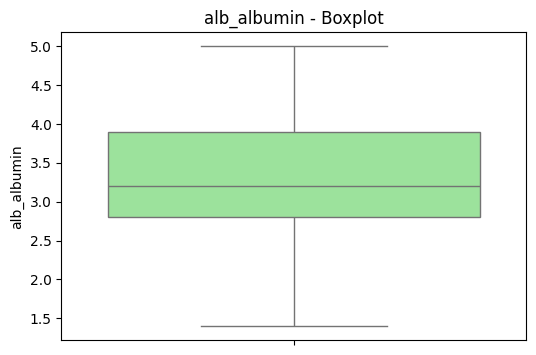


Summary Statistics for ag_ratio_albumin_and_globulin_ratio:
 count    11207.000000
mean         0.976519
std          0.238369
min          0.350000
25%          0.800000
50%          1.000000
75%          1.100000
max          1.550000
Name: ag_ratio_albumin_and_globulin_ratio, dtype: float64


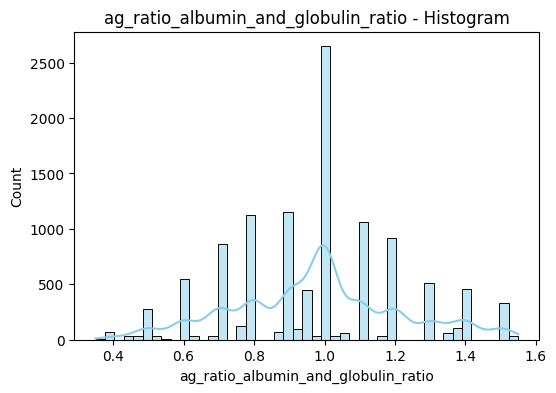

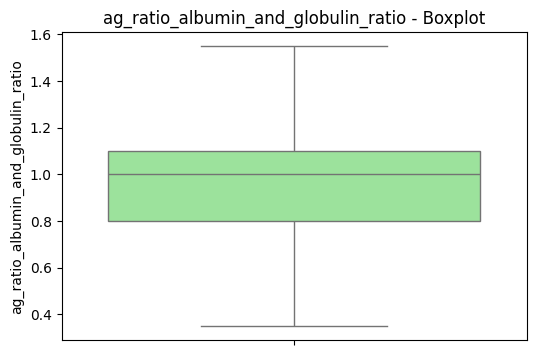


Summary Statistics for result:
 count    11207.000000
mean         1.400107
std          0.489942
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: result, dtype: float64


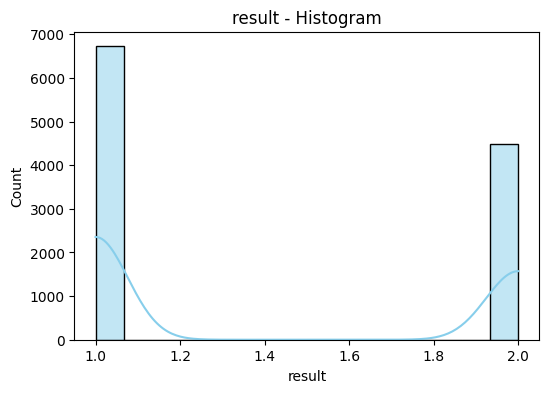

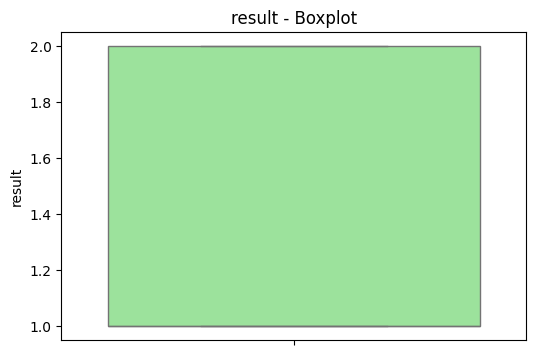

In [17]:
# --- UNIVARIATE ANALYSIS ---
# ---------- CATEGORICAL VARIABLES ----------
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"{col} - Count Plot")
    plt.xticks(rotation=45)
    plt.show()

# ---------- NUMERICAL VARIABLES ----------
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    print(f"\nSummary Statistics for {col}:\n", df[col].describe())

    # Histogram
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"{col} - Histogram")
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"{col} - Boxplot")
    plt.show()

<b> Bivariate Analysis </b>

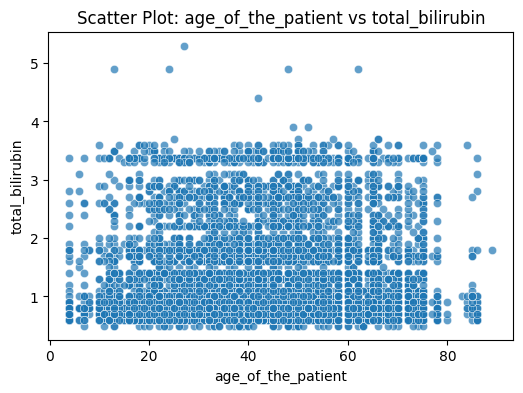

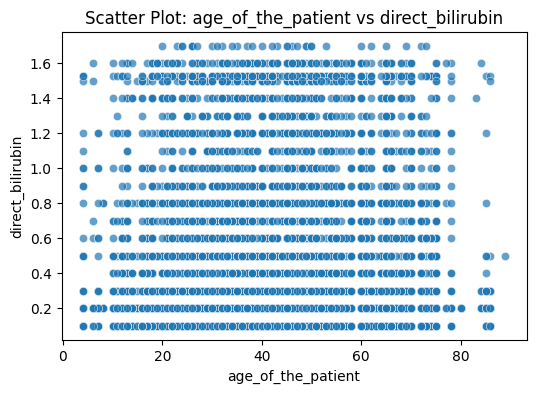

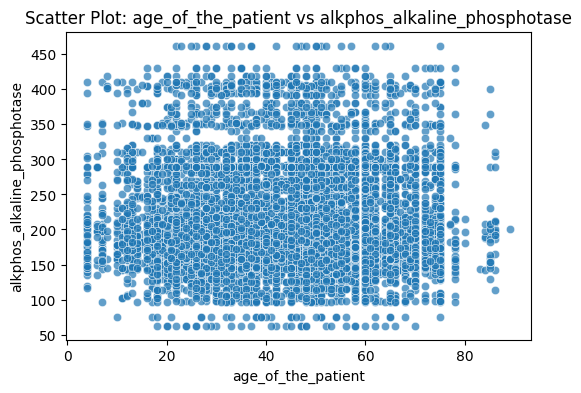

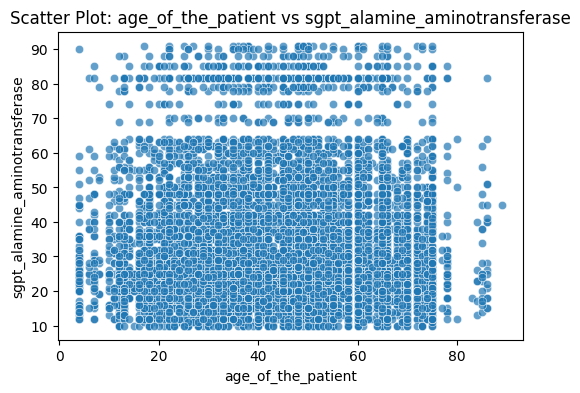

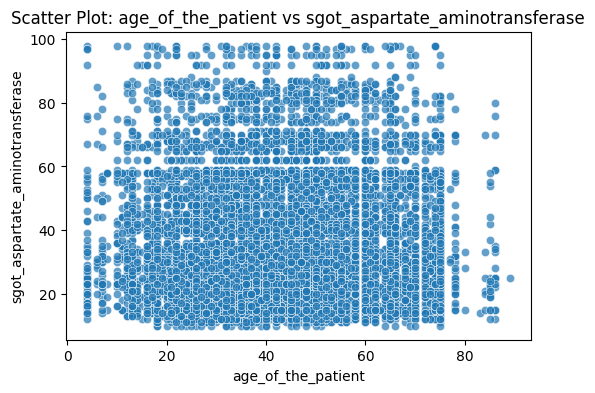

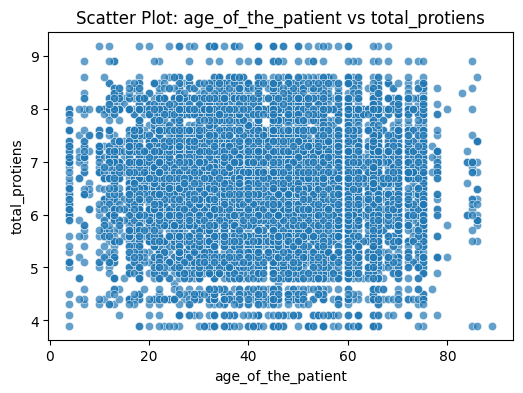

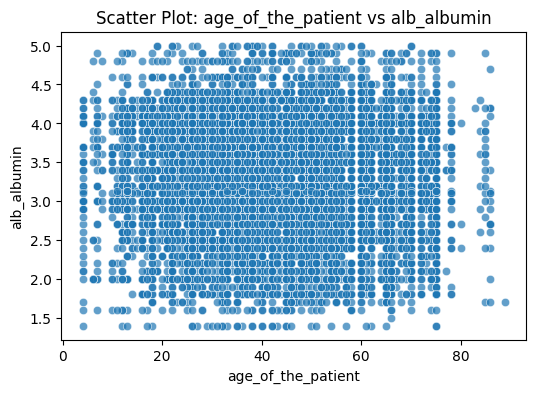

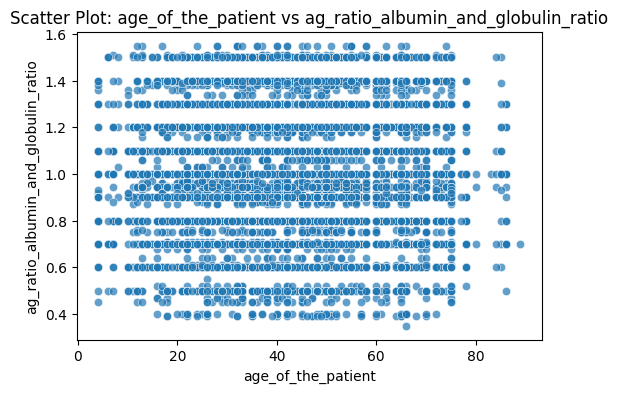

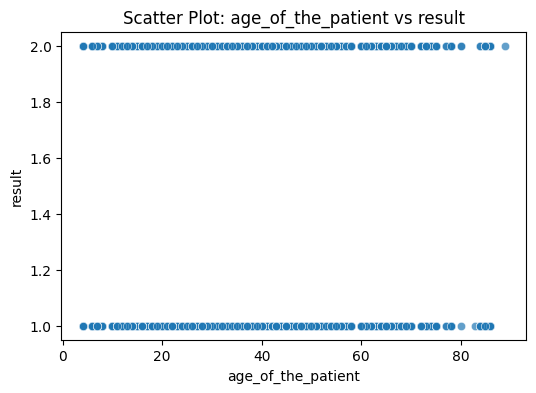

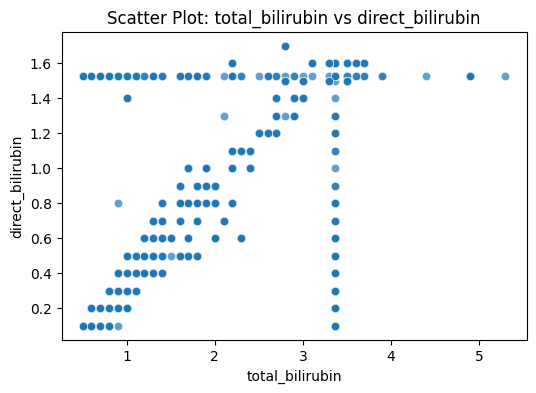

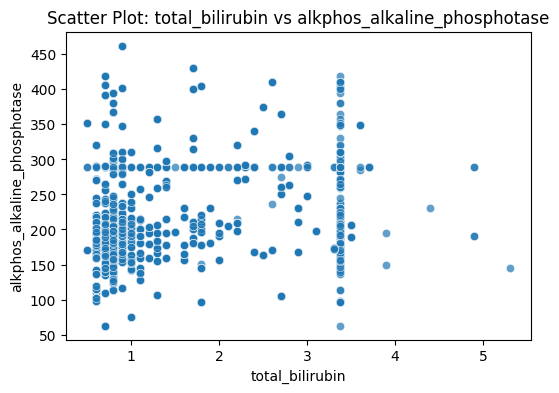

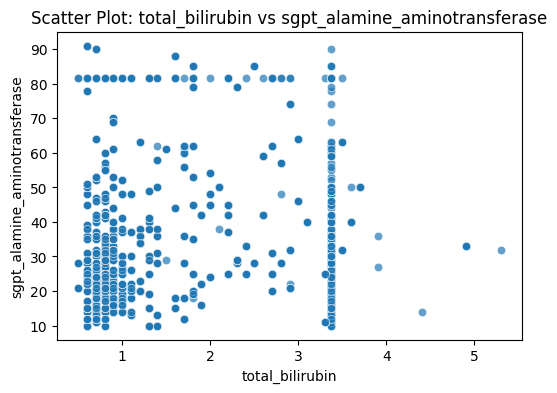

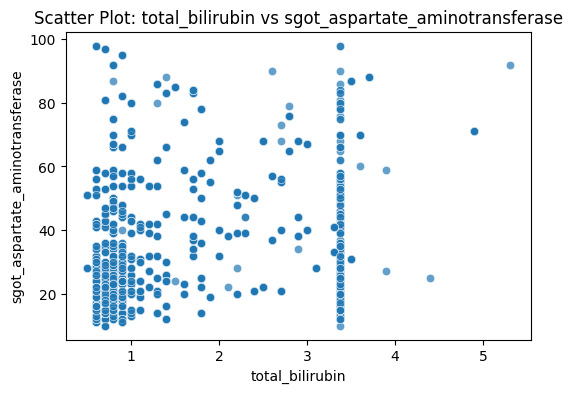

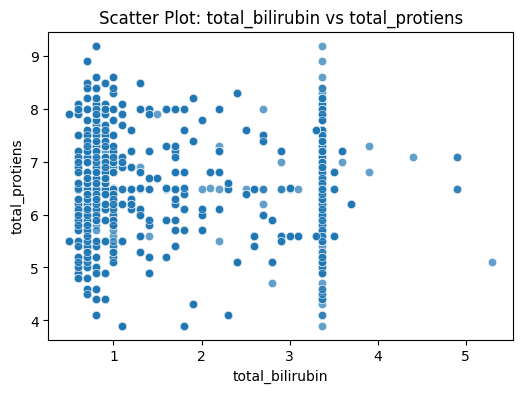

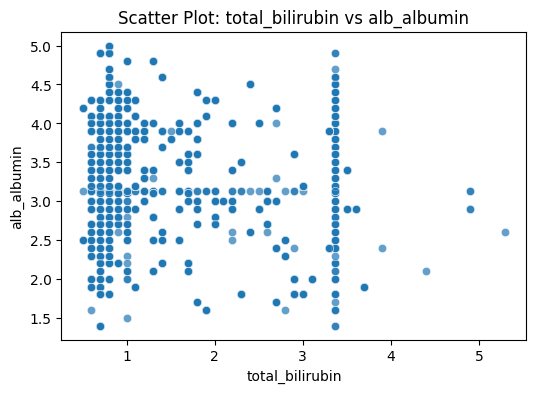

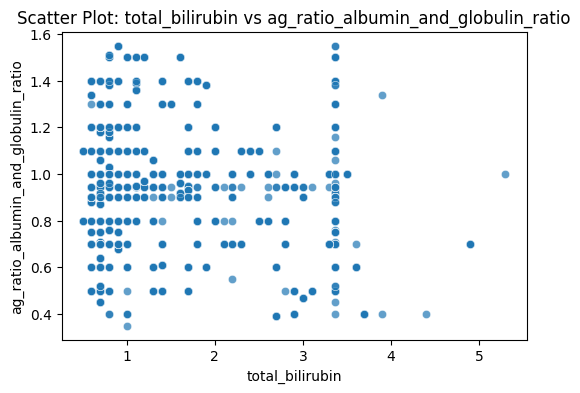

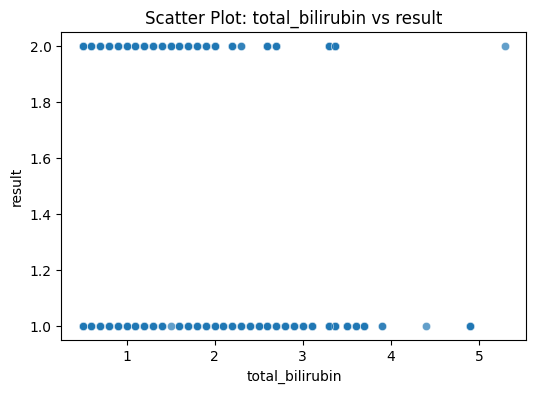

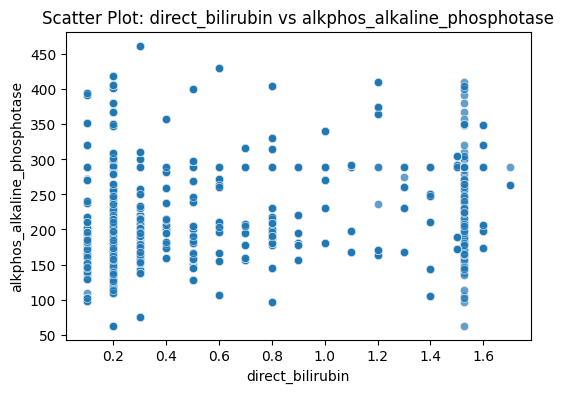

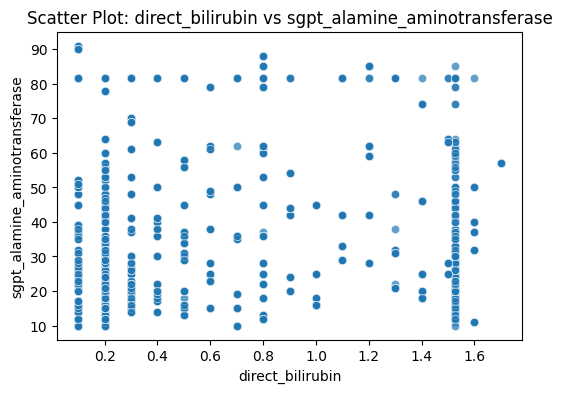

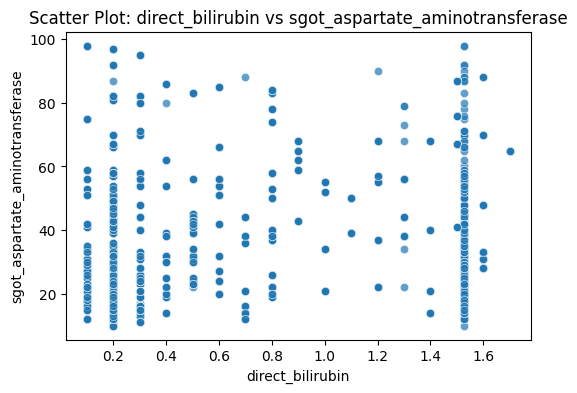

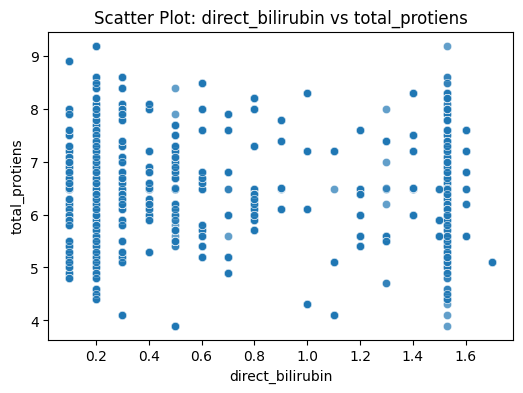

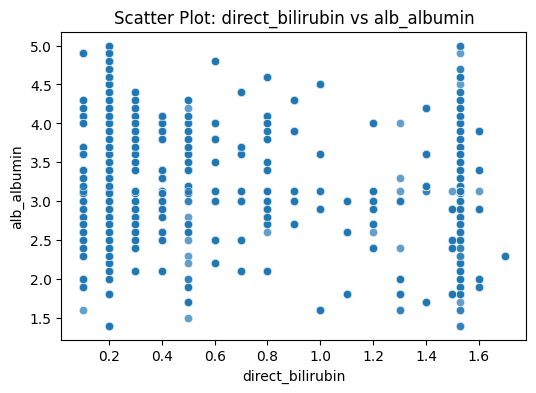

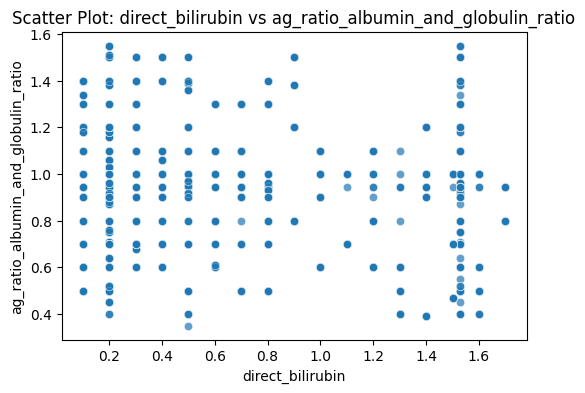

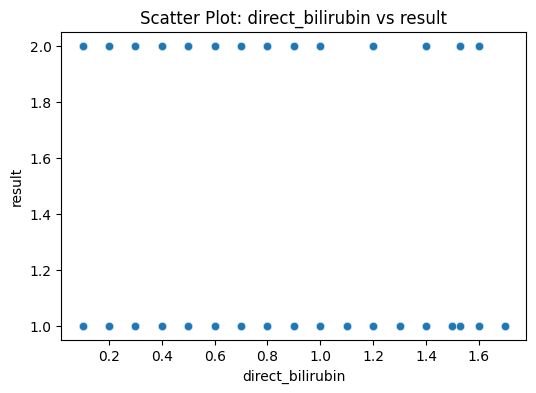

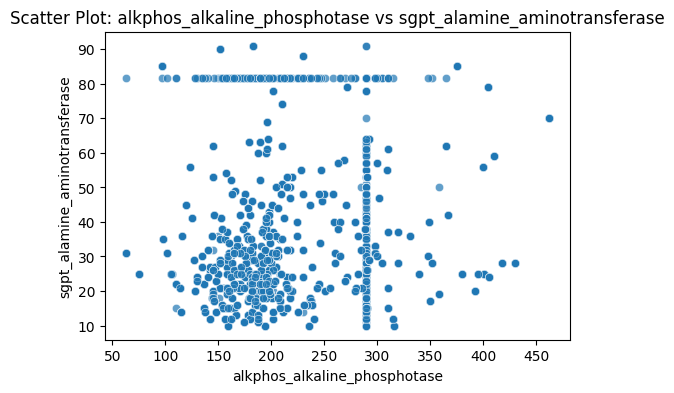

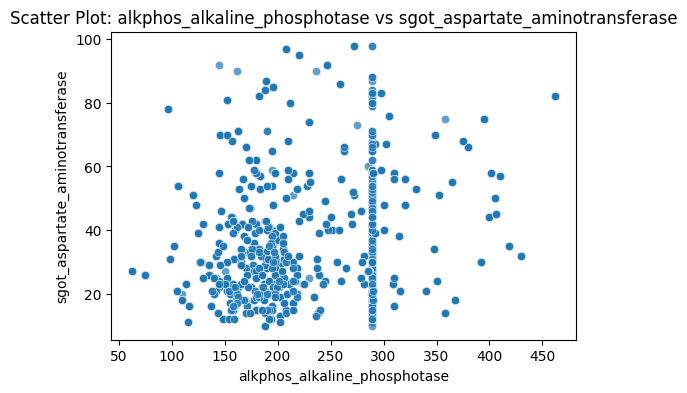

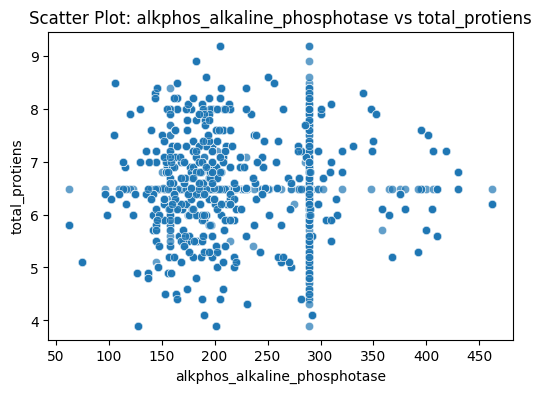

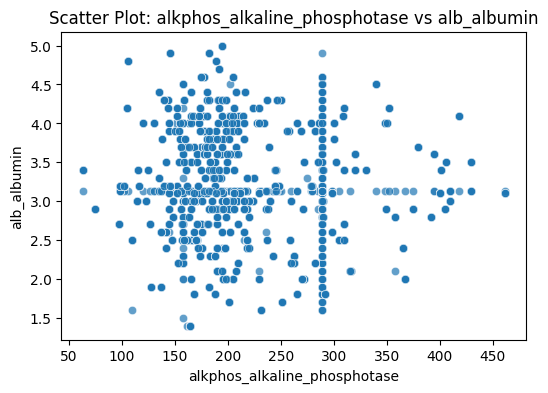

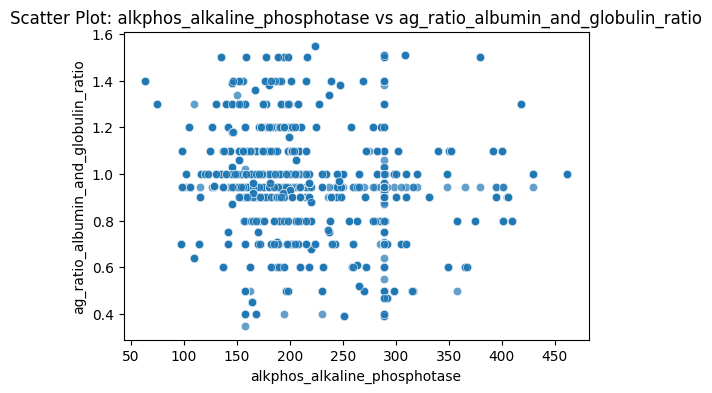

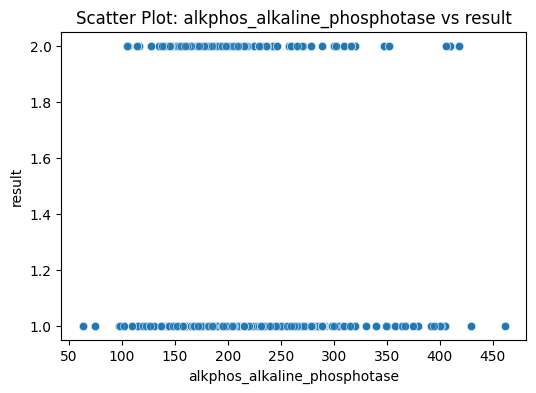

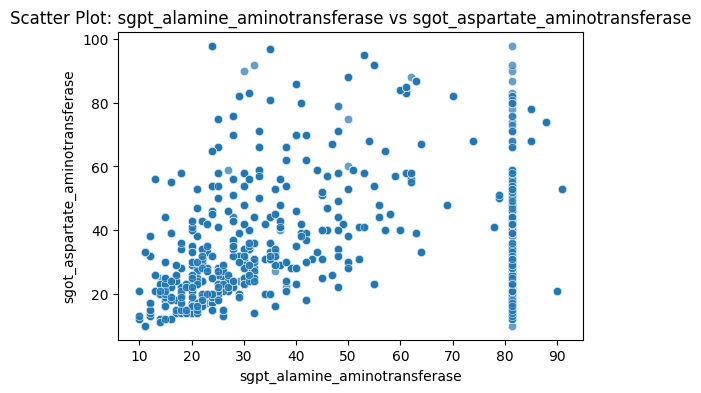

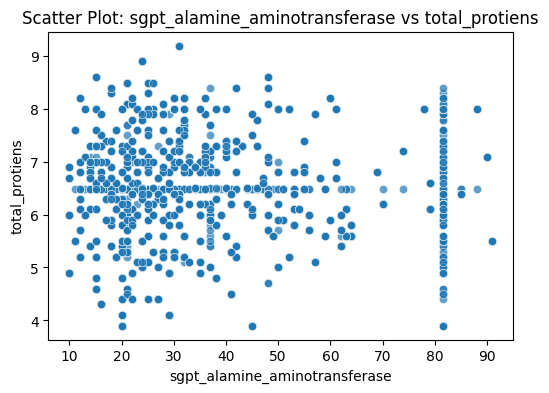

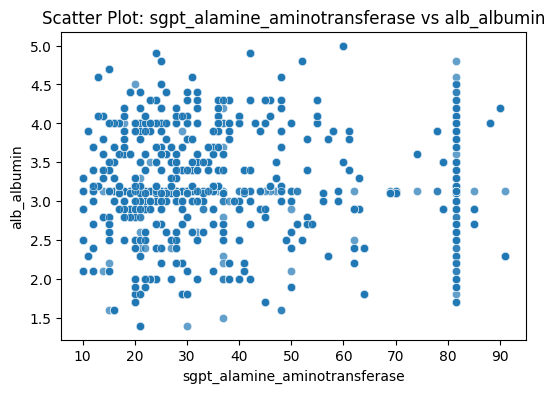

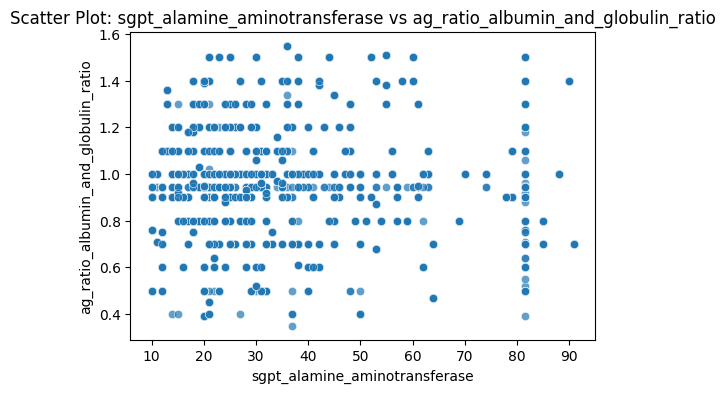

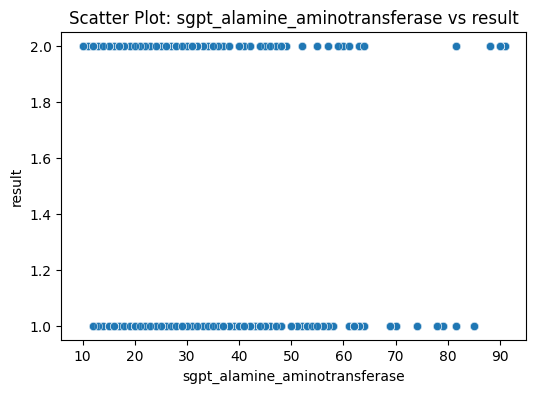

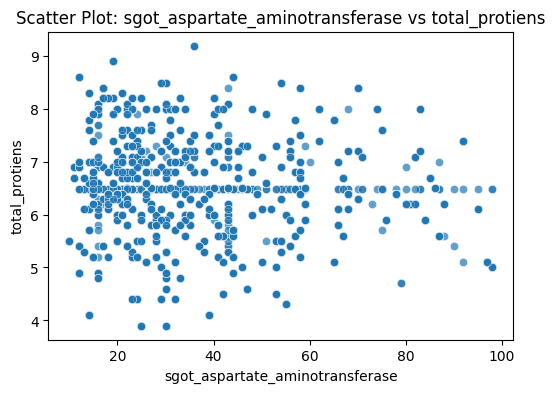

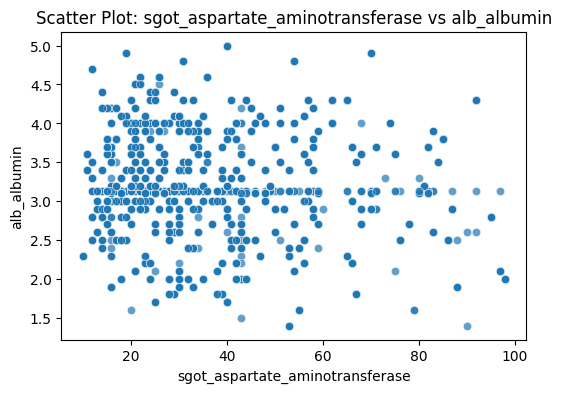

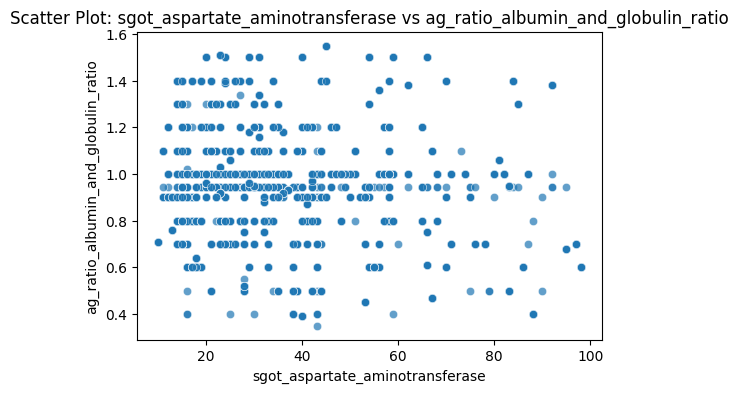

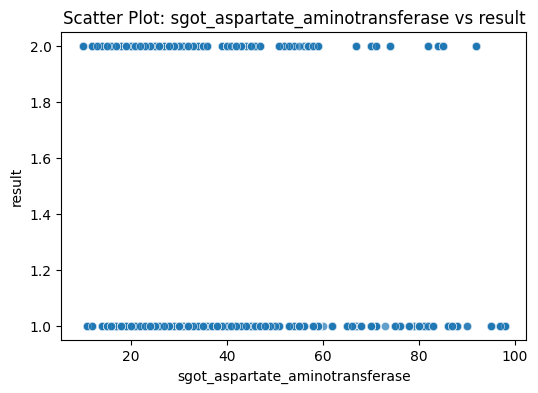

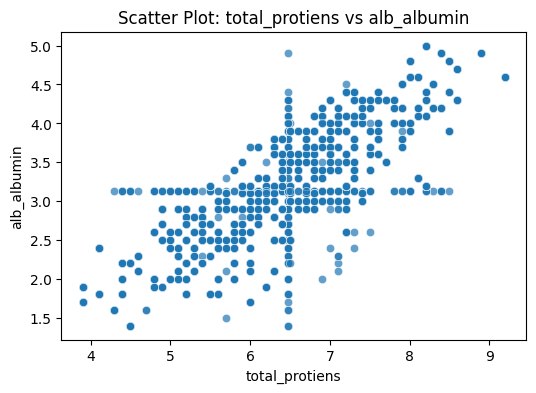

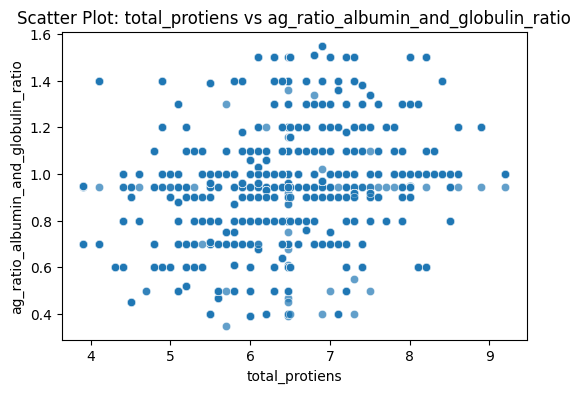

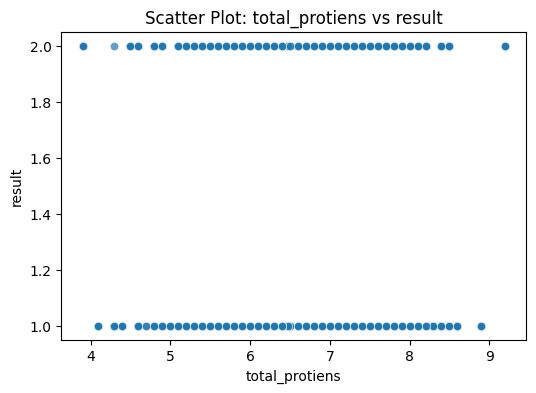

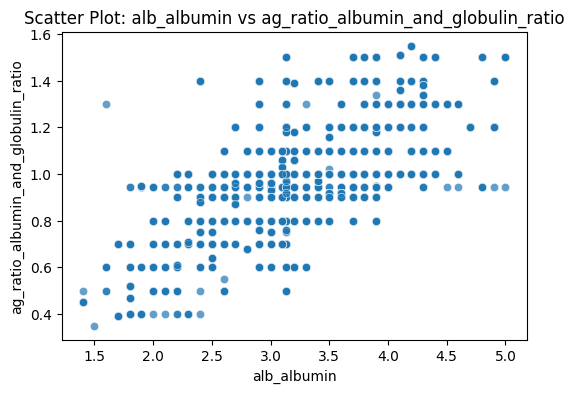

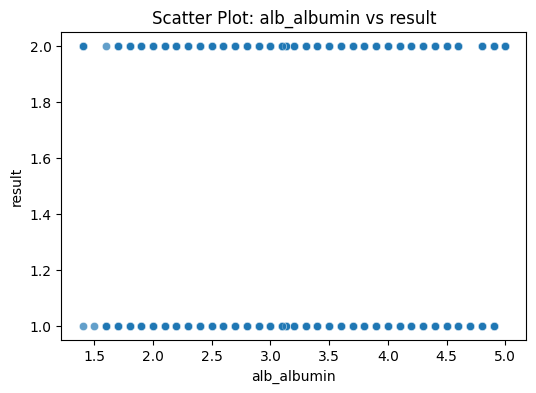

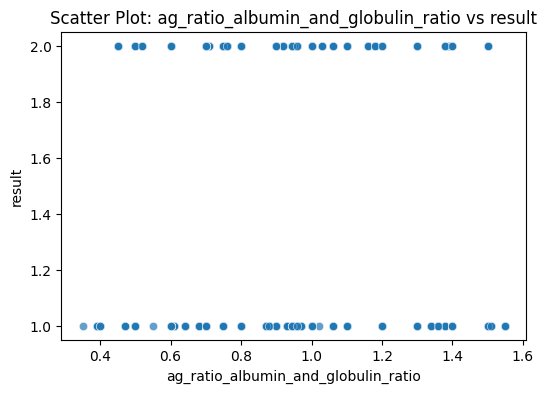

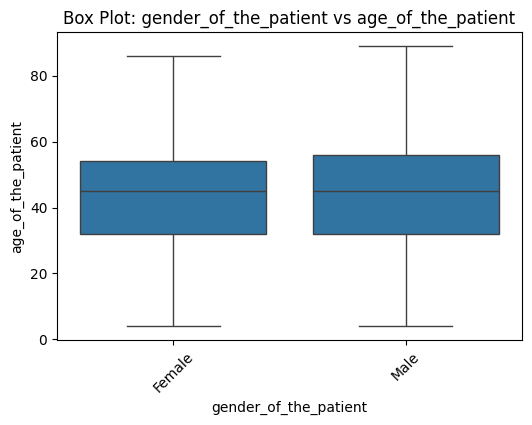

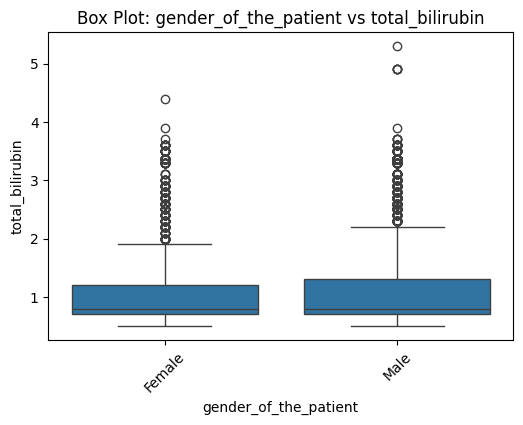

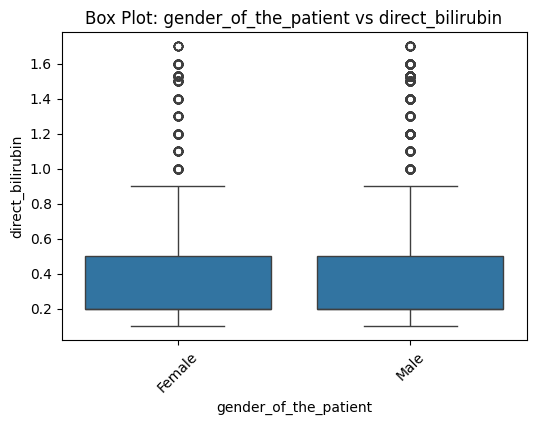

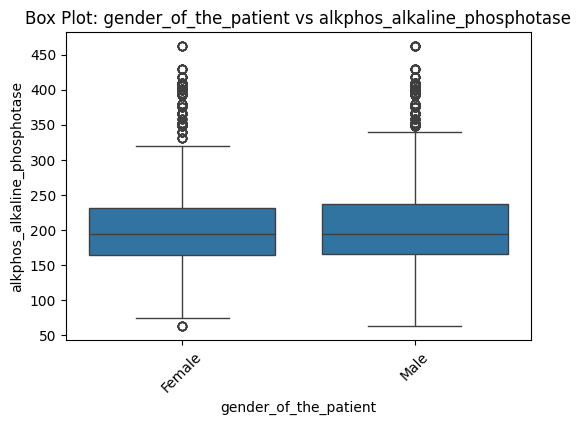

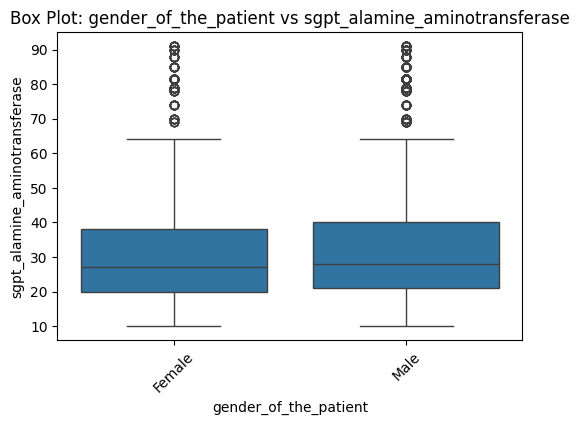

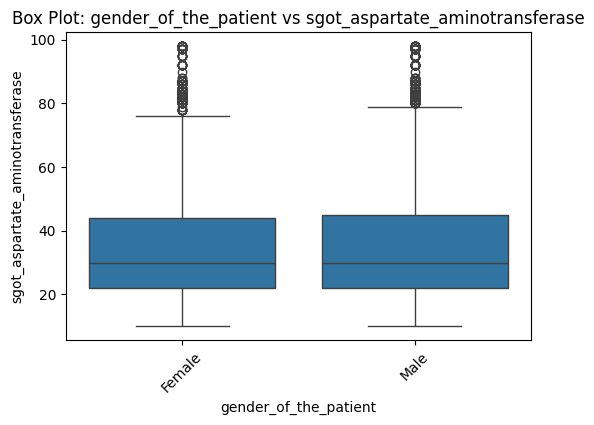

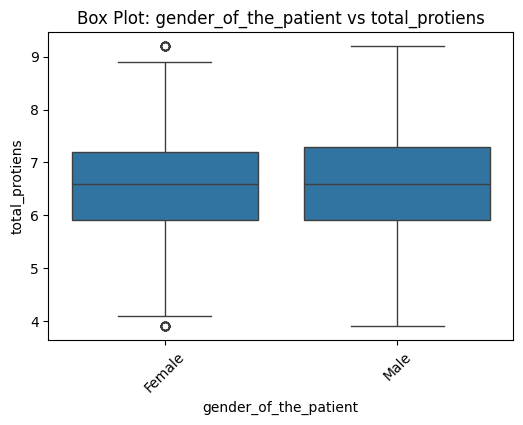

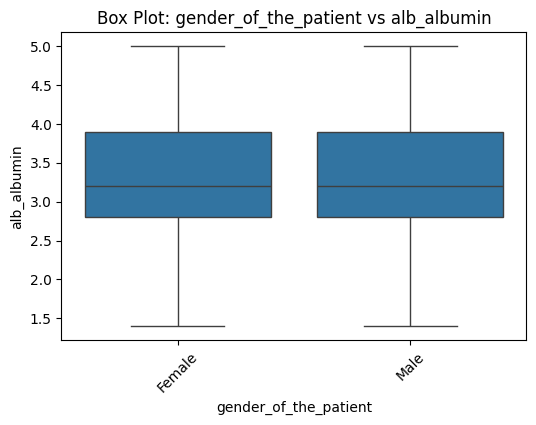

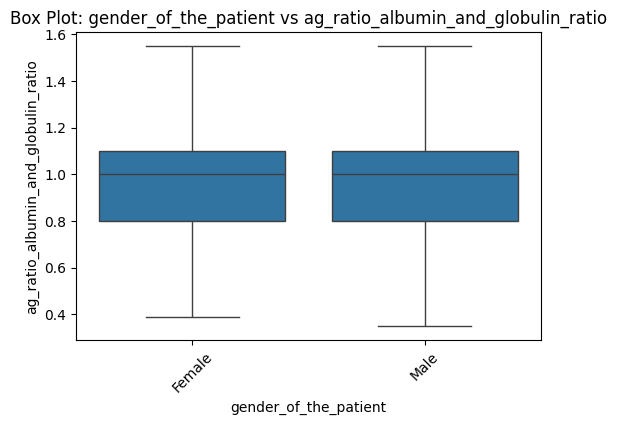

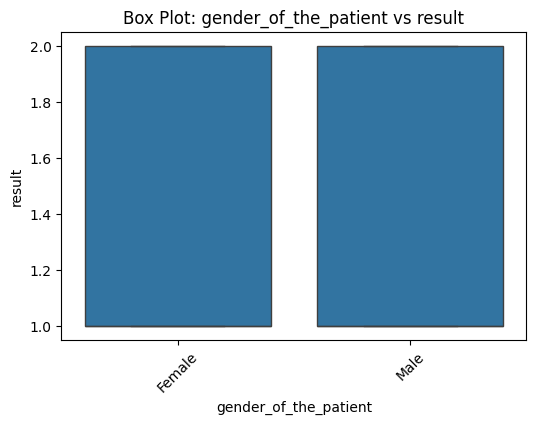

In [18]:
# ----------------------------
# Numerical vs Numerical
# ----------------------------
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[num_cols[i]], y=df[num_cols[j]], alpha=0.7)
        plt.title(f"Scatter Plot: {num_cols[i]} vs {num_cols[j]}")
        plt.show()

# ----------------------------
# Numerical vs Categorical
# ----------------------------
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[cat], y=df[num])
        plt.title(f"Box Plot: {cat} vs {num}")
        plt.xticks(rotation=45)
        plt.show()

# ----------------------------
# Categorical vs Categorical
# ----------------------------
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        ctab = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
        plt.figure(figsize=(6,4))
        sns.heatmap(ctab, annot=True, fmt="d", cmap="YlGnBu")
        plt.title(f"Heatmap: {cat_cols[i]} vs {cat_cols[j]}")
        plt.show()

<h2> <b>Multivariate Analysis </b> </h2>

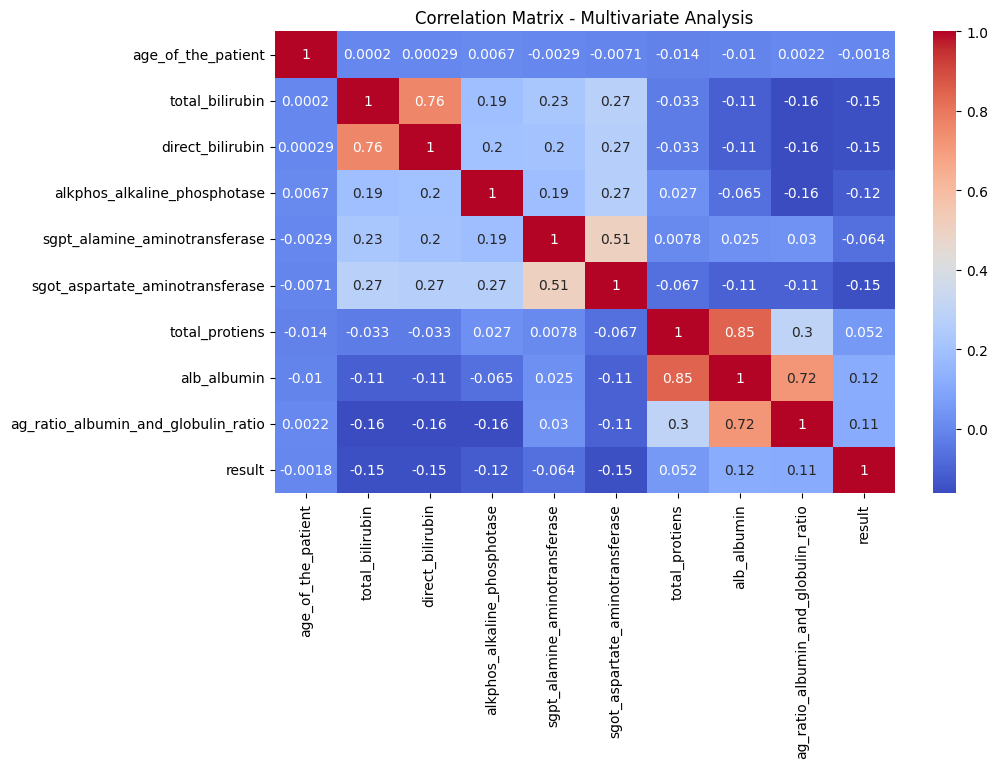

In [ ]:
# 1. Correlation Matrix (for numeric variables)
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Multivariate Analysis")
plt.show()

# 2. Pairplot (scatterplots + histograms for multiple variables)
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot - Multivariate Analysis", y=1.02)
plt.show()

# 3. Grouped Boxplot (categorical vs. multiple numerical)
# Replace 'CategoryColumn' with your categorical column name
# Example: 'Species' in iris dataset
category_col = df.select_dtypes(include=['object']).columns[0]  # first categorical col
numeric_cols = df.select_dtypes(include=['number']).columns[:3]  # first 3 numeric cols

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=category_col, y=col, data=df)
    plt.title(f"{col} vs {category_col}")
plt.tight_layout()
plt.show()

# 4. 3D Scatter Plot (numeric variables)
from mpl_toolkits.mplot3d import Axes3D

if len(numeric_cols) >= 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[numeric_cols[0]], df[numeric_cols[1]], df[numeric_cols[2]],
               c='blue', marker='o')
    ax.set_xlabel(numeric_cols[0])
    ax.set_ylabel(numeric_cols[1])
    ax.set_zlabel(numeric_cols[2])
    plt.title("3D Scatter Plot - Multivariate Analysis")
    plt.show()